In [4]:
%matplotlib inline 
import matplotlib
from matplotlib import pyplot as plt

import numpy as np
from numpy.lib.scimath import sqrt as csqrt
from math import *

/home/mozzons/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


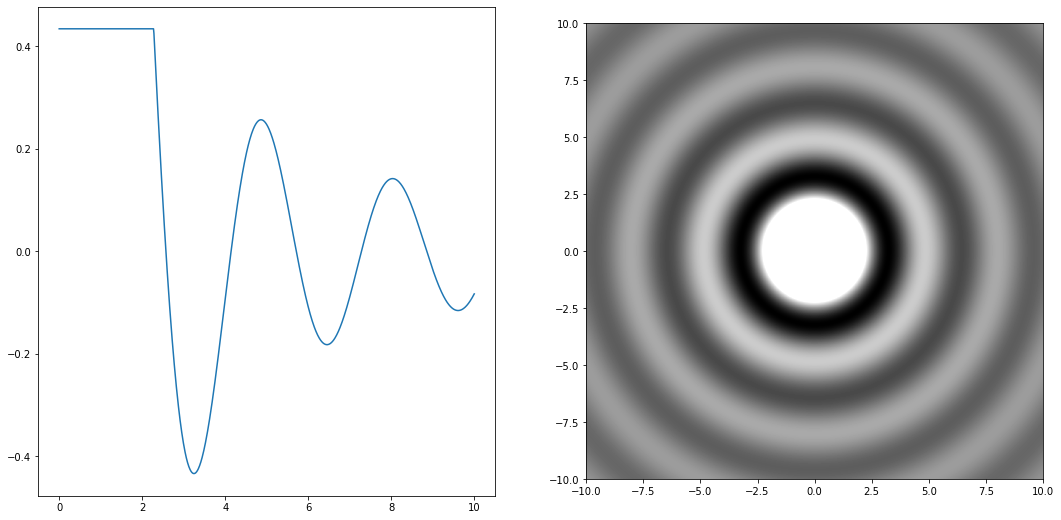

In [5]:
# Create a simplified model of a gravitational wave

side = 20.
n = 2001
x_side = np.linspace(-side/2,side/2,n)

func = lambda M,r: M*np.sin(2*(r-1))/(r-1)
r = np.linspace(0,10,1000)
mass = 1

X,Y = np.meshgrid(x_side,x_side)
rad = lambda x,y: np.sqrt(x**2+y**2)
wave = func(mass, rad(X,Y))
wave = np.nan_to_num(wave, nan=1000)
wave[wave>-min(wave[int(n/2)])] = -min(wave[int(n/2)])
image = func(mass, rad(X,Y)) 

fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(18,9))
# plot section of the wave
wave_sec = func(mass, r)
wave_sec[wave_sec>-min(wave_sec[1:])] = -min(wave_sec[1:])
ax.plot(r, wave_sec)
# plot the wave in the grid
ax2.imshow(image, extent=[X.min(),X.max(),Y.min(),Y.max()], cmap='gray', vmin=min(image[1000]), 
           vmax=-min(image[1000]))
plt.savefig("plots/wave.png")
plt.show()

-1.0 -0.0


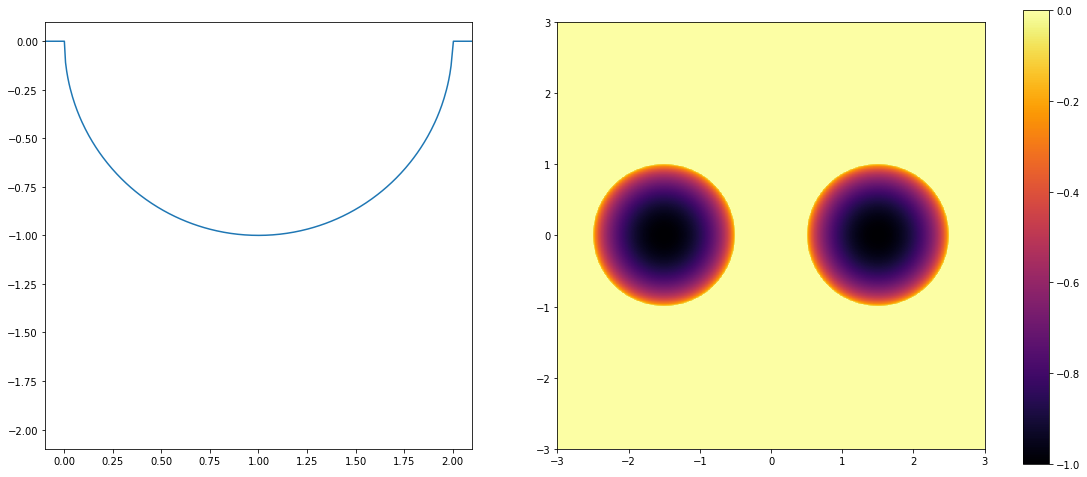

In [6]:
# Create a model for the black holes/neutron stars

z = lambda x,y,x0,y0,r2: - np.real(csqrt(r2-(x-x0)**2-(y-y0)**2))
circ = lambda x,x0: - np.real(csqrt(1-(x-x0)**2))

side = 6.
n = 1001
x_side = np.linspace(-side/2,side/2,n)
A,B = np.meshgrid(x_side,x_side)
bbh = z(A,B, 1.5, 0, 1) + z(A,B, -1.5, 0, 1)
sec = circ(x_side, 1)
print(min(bbh[500]),max(bbh[500]))

fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(18,9))
# Plot section of the black hole.
ax.plot(x_side, sec)
ax.set_xlim(-0.1,2.1)
ax.set_ylim(-2.1,0.1)
ax.set_aspect('equal', adjustable='box')
# plot bhs in the grid
im2 = ax2.imshow(bbh, extent=[A.min(),A.max(),B.min(),B.max()], cmap="inferno", vmin=min(bbh[500]), 
           vmax=max(bbh[500]))

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])

fig.colorbar(im2, cax=cbar_ax)
plt.savefig("plots/black_holes.png")
plt.show()

/home/mozzons/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


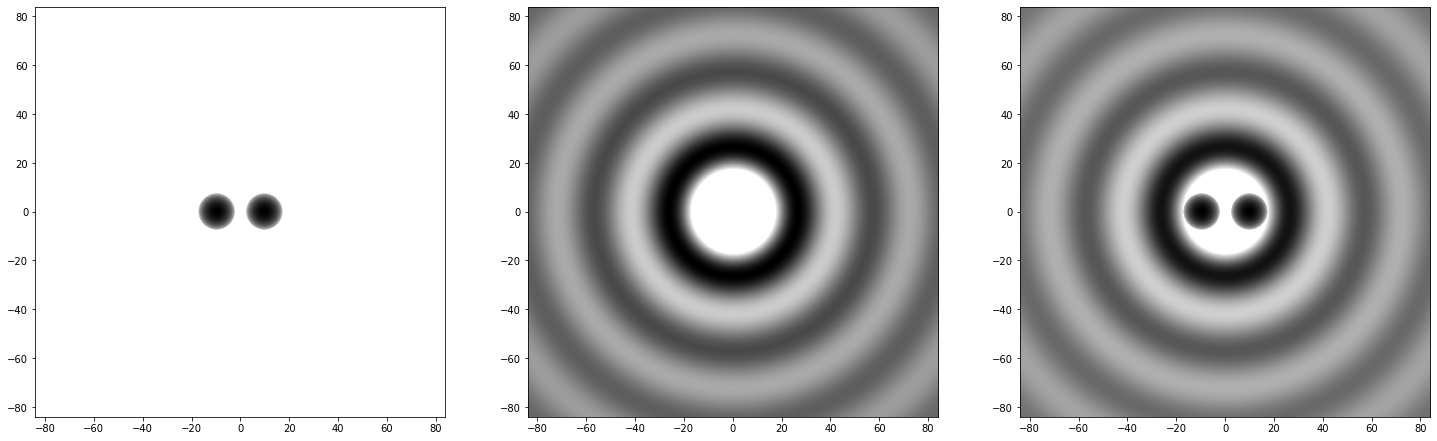

In [7]:
# Grid parameters side:112mm

mult_factor = 1.5 # Factor to rescale the image to include more waves without affecting the white plateau size
side = int(112*mult_factor)
n = 20*side+1
x_side = np.linspace(-side/2,side/2,n)

# Compact binary parameters (mass) and black holes position and size
mass = 13.5
period = 15
x0 = 6.5*mult_factor
y0 = 0 
radius = 5*mult_factor
white = 5 # To increse the size of the white central plateaux

# Functions to create the wave
rad = lambda x,y: np.sqrt(x**2+y**2)
func = lambda M,r: M**(5./3)*np.sin(pi*(r-white)/period)/(r-white)
# Function for the black holes
z = lambda x,y,x0,y0,r2: - np.real(csqrt(r2-(x-x0)**2-(y-y0)**2))

# Define grid and compute functions on the grid
X,Y = np.meshgrid(x_side,x_side)
wave = func(mass, rad(X,Y))
wave = np.nan_to_num(wave, nan=1000)
wave[wave>-min(wave[int(n/2)])] = -min(wave[int(n/2)])
bbh = z(X,Y, x0, y0, radius**2) + z(X,Y, -x0, -y0, radius**2)

# Sum the waves with the black holes
gw = wave + bbh

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(25,9))
ax1.imshow(bbh, extent=[X.min(),X.max(),Y.min(),Y.max()], cmap='gray')
ax2.imshow(wave, extent=[X.min(),X.max(),Y.min(),Y.max()], cmap='gray')
ax3.imshow(gw, extent=[X.min(),X.max(),Y.min(),Y.max()], cmap='gray')
plt.show()

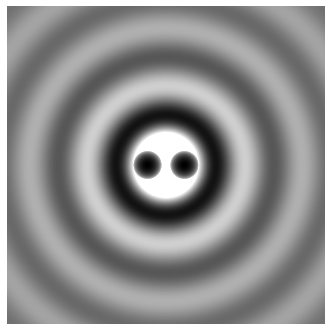

In [8]:
cm = 1/2.54

fig_side=11.2
fig = plt.figure(frameon=False, figsize=(fig_side*cm,fig_side*cm))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(gw, extent=[X.min(),X.max(),Y.min(),Y.max()], cmap='gray')
plt.savefig("plots/gw_TU_test1.png", dpi=100/cm)